In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [6]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [10]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [11]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'AI News & Artificial Intelligence | TechCrunch',
  'url': 'https://techcrunch.com/category/artificial-intelligence/',
  'content': "### Anthropic reportedly nears $170B valuation with potential $5B round\n\n### Google’s NotebookLM rolls out Video Overviews\n\nOpenAI and ChatGPT logos\n\n### OpenAI launches Study Mode in ChatGPT\n\nSpotify icon displayed on a phone screen\n\n### Spotify hints at a more chatty voice AI interface in the future\n\nA person holding an iPhone and using Google AI Mode\n\n### Google’s AI Mode gets new ‘Canvas’ feature, real-time help with Search Live, and more [...] Microsoft CEO Satya Nadella speaks during the OpenAI DevDay event on November 06, 2023 in San Francisco, California.\n\n### Microsoft in talks to maintain access to OpenAI’s tech beyond AGI milestone\n\n### AI data analyst startup Julius nabs $10M seed round\n\n### Harmonic, the Robinhood CEO’s AI math startup, launches an AI chatbot app\n\nMicrosoft Edge Copilot Mode\n\n### Microsoft E

In [12]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [17]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b")

In [18]:
llm.invoke("What is AI")

AIMessage(content='<think>\nOkay, the user asked "What is AI," so I need to explain AI in simple terms. Let me start by breaking down the basics. AI refers to machines or software that can perform tasks requiring human-like intelligence. But how to make it clear without jargon?\n\nFirst, mention that AI is a branch of computer science. Then, list common applications people might know, like virtual assistants or recommendation systems. Maybe include examples like Siri or Netflix recommendations. But wait, the user might not be familiar with all these terms, so keep it general.\n\nNext, explain the different types of AI. There\'s narrow AI, which is what most systems today are, focused on specific tasks. Then general AI, which is more human-like but still theoretical. Also, maybe mention machine learning as a subset, since it\'s crucial. But need to differentiate between AI and machine learning.\n\nAlso, address the goals of AI: solving complex problems, automation, pattern recognition. 

In [19]:
llm_with_tools=llm.bind_tools(tools=tools)

In [20]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on AI. Let me think about which tool to use here. The available tools are arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is good for academic papers, but the user wants news, not research papers. Wikipedia might have general information, but it\'s not the best source for the latest news. Tavily_search_results_json sounds like a search engine that can fetch recent news articles. So I should use that.\n\nI need to make sure the query is properly formatted. The function requires a "query" parameter. The user\'s query is "recent news on AI". So I\'ll structure the tool call with that query using tavily_search_results_json. That should retrieve the latest news articles on AI.\n', 'tool_calls': [{'id': 'z0bq7fxt1', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'complet

In [21]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the latest research on quantum computing. I need to figure out which tool to use here. The available tools are arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is a great source for the latest academic papers, so that might be the best bet since the user is asking for "latest research." Wikipedia could provide some general background, but it might not have the most up-to-date information. Tavily seems to be a search tool, but I\'m not as familiar with it. Maybe it\'s a search engine? But arxiv is more specific to research papers.\n\nSo I\'ll go with arxiv. The function requires a query parameter. The user\'s query is "latest research on quantum computing," so I should structure the arxiv search query accordingly. Maybe use keywords like "quantum computing" and sort by date to get the most recent papers. Let me make sure the query is properly formatted for arxiv\'s search. I\'ll use 

In [22]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is machine learning?" I need to provide a clear and concise answer. Let me start by recalling the basic definition. Machine learning is a subset of artificial intelligence that involves systems learning from data. But maybe I should elaborate a bit more.\n\nWait, should I mention how it differs from traditional programming? Yes, because in traditional programming, you write explicit instructions, whereas in machine learning, the system learns patterns from data. That\'s an important distinction.\n\nThe user might also want to know about the types of machine learning. Supervised, unsupervised, and reinforcement learning are the main ones. Including examples could help, like classification for supervised or clustering for unsupervised.\n\nI should also touch on applications to show its relevance. Things like image recognition, recommendation systems, and natural language processing. Maybe mentio

### Workflow with Langgraph and REact

In [23]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [24]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [25]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

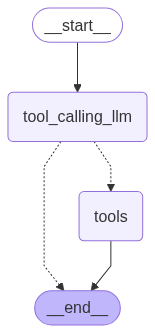

In [26]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [27]:
messages=graph.invoke({"messages":"1706.03762"}) # 1706.03762 this is research pepar number
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (mv93my77b)
 Call ID: mv93my77b
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [31]:
messages=graph.invoke({"messages":"who is dr. yunus"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

who is dr. yunus
================================== Ai Message ==================================
Tool Calls:
  wikipedia (s407yzzhg)
 Call ID: s407yzzhg
  Args:
    query: Dr. Yunus
================================= Tool Message =================================
Name: wikipedia

Page: Muhammad Yunus
Summary: Muhammad Yunus (born 28 June 1940) is a Bangladeshi economist, entrepreneur, civil society leader and statesman who has been serving as the fifth chief adviser of Bangladesh since 8 August 2024. Yunus pioneered the modern concept of microcredit and microfinance, for which he was awarded the Nobel Peace Prize in 2006 as the first Bangladeshi to win the Nobel Peace Prize and he is also the founder of Grameen Bank. 
Born in Hathazari, Chittagong, Yunus passed his matri


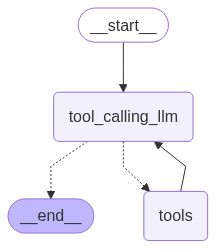

In [32]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [33]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (v7qq09sbb)
 Call ID: v7qq09sbb
  Args:
    query: recent AI news 2024
  arxiv (ck6ev28an)
 Call ID: ck6ev28an
  Args:
    query: quantum computing recent research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Top 10 AI Stories of 2024 - IEEE Spectrum", "url": "https://spectrum.ieee.org/top-ai-stories-2024", "content": "In 2024, we highlighted investment in generative AI, the cost and environmental footprint of training foundation models, corporate reports of AI helping the bottom line, and public wariness of AI.\n\n## 7. A New Type of Neural Network Is More Interpretable\n\ndeep purple dots and lines con